# Analisys of Brazilian Congress law propositions using text clustering with unsupervised learning

This notebook analises a dataset containing propositions made by congress men and congress women in Brazil during the year of 2023, aiming to create clusters to categorize themes of these propositions

Such a grouping can help analyse what themes are being more discussed and provide more transparency to law propositions attending to public interest

## Steps
* Load and clean our dataset
* Tokenize and vectorize the data
* Categorize the data accordinly to the groups created

## Dataset
* Retrieved dataset from https://dadosabertos.camara.leg.br/swagger/api.html#staticfile
* The file proposicoes.csv can be retrieved directly in https://dadosabertos.camara.leg.br/arquivos/proposicoes/csv/proposicoes-2023.csv


### Import dependencies

In [14]:
#data preprocessing
import pandas as pd, numpy as np

#nlp libraries
import nltk
from nltk.corpus import stopwords

#machine learning libraries
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

### Load the dataset

In [73]:
df = pd.read_csv('proposicoes-2023.csv', sep=";", 
                 usecols=["id", "uri", "siglaTipo", "ano", "descricaoTipo", "ementa", "ementaDetalhada", "keywords"], 
                 dtype={"id": int, 
                        "uri": "str",
                        "siglaTipo": "str", 
                        "ano": int,
                        "descricaoTipo": "str",
                        "ementa": "string",
                        "ementaDetalhada": "str",
                        "keywords": "string"})

In [74]:
df.head(3)

,id,uri,siglaTipo,ano,descricaoTipo,ementa,ementaDetalhada,keywords
0,1198010,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,2023,Projeto de Lei,Altera redação de dispositivos do artigo 4° da...,Possibilita o uso de recursos do Fundo Naciona...,"Alteração, Lei do Fundo Nacional de Segurança ..."
1,2115253,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,2023,Projeto de Lei,Dispõe sobre a prestação de serviços postais a...,NaN,"Critério, contratação, serviço postal, órgão p..."
2,2345485,https://dadosabertos.camara.leg.br/api/v2/prop...,PL,2023,Projeto de Lei,Institui a Política Nacional de Longo Prazo.,NaN,"Criação, Política Nacional de Longo Prazo (PNL..."


### Clean the data
The loaded dataset contains a number of types of propositions that are of no interest to the proposed analysis, so is necessary to clean the dataset
In this notebook we are considering the field "ementa" as the text to be classified also we are considering only law propositions, so we are limiting the types of propositions (that are classified in the field "descricaoTipo") to "Projeto de Lei" (law project) and "Medida Provisória" (a legal act in Brazil through which the President can create a temporary law)

In [66]:
# extract text
texts = df[(~df['ementa'].isna()) & (df['descricaoTipo'].isin(["Projeto de Lei", "Medida Provisória"]))].ementa 

In [75]:
# load stopwords package to be used in the vectorization of data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Users\mauricio.matos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Vectorize the dataset

In [42]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('portuguese'))
X = vectorizer.fit_transform(texts)

### Create the model
implement a k-means clustering algorithm in our vectorized data

In [46]:
#maximum number of clusters
number_of_clusters = 20

model = KMeans(n_clusters=number_of_clusters, 
               init='k-means++', 
               max_iter=100,
               n_init=1)

model.fit(X)

KMeans(max_iter=100, n_clusters=20, n_init=1)

### Centroids and features

In [47]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

### Print the Clusters created and common terms for each cluster

In [67]:
for i in range(number_of_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 lei
 nº
 altera
 art
 estabelece
 12
 sobre
 federal
 dispor
 nacional
Cluster 1:
 violência
 doméstica
 2006
 340
 agosto
 mulher
 11
 familiar
 lei
 vítimas
Cluster 2:
 dia
 nacional
 institui
 anualmente
 comemorado
 conscientização
 democracia
 cria
 celebrado
 outubro
Cluster 3:
 10
 civil
 lei
 nº
 2003
 código
 altera
 105
 2002
 826
Cluster 4:
 imposto
 renda
 1995
 isenção
 sobre
 250
 pessoas
 físicas
 industrializados
 ipi
Cluster 5:
 1940
 848
 penal
 decreto
 código
 dezembro
 lei
 nº
 crime
 altera
Cluster 6:
 providências
 outras
 dá
 sobre
 dispõe
 institui
 lei
 altera
 nº
 nacional
Cluster 7:
 estado
 município
 capital
 confere
 título
 nacional
 rio
 sul
 pará
 grande
Cluster 8:
 segurança
 pública
 2018
 nº
 lei
 14
 junho
 altera
 13
 sobre
Cluster 9:
 deficiência
 pessoa
 146
 pessoas
 2015
 lei
 13
 benefício
 nº
 julho
Cluster 10:
 educação
 394
 1996
 20
 bases
 dezembro
 diretrizes
 lei
 ensino
 básica
Cluster 11:
 1998
 605
 fevereiro
 12
 lei
 6

In [53]:
for ind in order_centroids[cluster, :10]:
    print(' %s' % terms[ind])

 lei
 nº
 altera
 art
 estabelece
 12
 sobre
 federal
 dispor
 nacional


### Create a new categorized dataframe
Now we can create a new dataframe based on our text data and the clusters created to classify the propositions information

In [55]:
# method to categorize a text based on our model
def classify_text(txt):
    X = vectorizer.transform([txt])
    cluster = model.predict(X)[0]
    return cluster

In [69]:
# dataframe with text propostion and categorization
df_c = pd.DataFrame(texts)
df_c['cluster'] = df_c.ementa.apply(classify_text)

### Analysis
Analysis of the categorized dataframe. After our categorization, it's possible to get insights from the law proposition data

For example, The Cluster Group 0 represents the majority of law propositions and it seems to be composed of propositions that alter existing laws, followed by Group 17 that seems to have propositions creating behavioral laws in public institutions

So now is possible to analyze a quantitative of themes proposed to turn into laws and create graphs to visualize the data

In [96]:
df_c.groupby("cluster")["ementa"].count()

cluster
0     1260
1      121
2      122
3      195
4      142
5      221
6      489
7      108
8      179
9       91
10     100
11      88
12     196
13      73
14      89
15      43
16     247
17     575
18      76
19     104
Name: ementa, dtype: int64

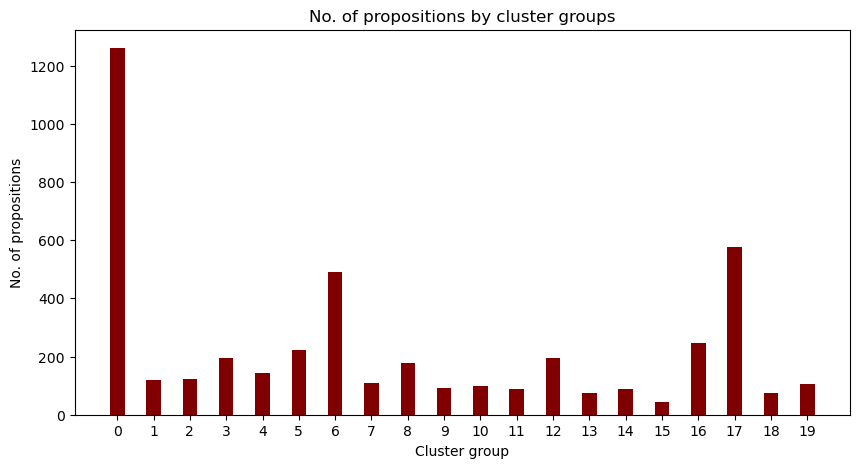

In [100]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (10, 5))

#iterate the summarized dataframe (number of propostions for cluster group)
df_s = df_c.groupby("cluster")["ementa"].count().reset_index()
  
# Generate a bar graph
plt.bar(df_s.cluster.astype(str), df_s.ementa, color ='maroon', 
        width = 0.4)
plt.xlabel("Cluster group")
plt.ylabel("No. of propositions")
plt.title("No. of propositions by cluster groups")
plt.show()